In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

# Data Exploration and key features

In [2]:
# Invoking the prepared data

df = pd.read_csv('all_data.csv')

We see the features:

In [3]:
df.sample()

,CO(GT)_winsor,PT08.S1(CO)_winsor,PT08.S4(NO2)_winsor,T_winsor,RH_winsor,AH_winsor,day_winsor,year_winsor,quarter_winsor,weekday_winsor,NO2(GT)_winsor,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,day,year,quarter,month,weekday,week_year,CO(GT)_winsor.1,PT08.S1(CO)_winsor.1,C6H6(GT)_winsor,PT08.S2(NMHC)_winsor,NOx(GT)_winsor,PT08.S3(NOx)_winsor,NO2(GT)_winsor.1,PT08.S4(NO2)_winsor.1,PT08.S5(O3)_winsor,T_winsor.1,RH_winsor.1,AH_winsor.1,day_winsor.1,year_winsor.1,quarter_winsor.1,month_winsor,weekday_winsor.1,week_year_winsor,air_quality
5991,0.572233,0.240188,0.32157,0.457463,0.501059,0.142354,0.758688,0.0,1.0,0.0,0.838242,2.4,925.0,8.6,923.0,442.0,841.0,162.0,1115.0,944.0,11.1,38.1,0.5023,15.0,2004.0,4.0,11.0,0.0,47.0,2.4,925.0,8.6,923.0,442.0,841.0,162.0,1115.0,944.0,11.1,38.1,0.5023,15.0,2004.0,4.0,11.0,0.0,47.0,bad


We now consider the relevant features, i. e., such features that are normalized and transformed as we did in the `exploration data` notebook, and the original data.

In [4]:
key_features_original = [
    "CO(GT)",
    "PT08.S1(CO)",
    "NO2(GT)",
    "PT08.S4(NO2)",
    "T",
    "RH",
    "AH",
    "day",
    "year",
    "quarter",
    "weekday",]

key_features_winsor = [
    "CO(GT)_winsor",
    "PT08.S1(CO)_winsor",
    "PT08.S4(NO2)_winsor",
    "NO2(GT)_winsor", 
    "T_winsor",
    "RH_winsor",
    "AH_winsor",
    "day_winsor",
    "year_winsor",
    "quarter_winsor",
    "weekday_winsor",
]

In [5]:
df_clusters = df[key_features_original+key_features_winsor]

In [6]:
df_clusters.sample(3)

,CO(GT),PT08.S1(CO),NO2(GT),PT08.S4(NO2),T,RH,AH,day,year,quarter,weekday,CO(GT)_winsor,PT08.S1(CO)_winsor,PT08.S4(NO2)_winsor,NO2(GT)_winsor,T_winsor,RH_winsor,AH_winsor,day_winsor,year_winsor,quarter_winsor,weekday_winsor
8016,1.9,1067.0,194.0,989.0,8.7,33.9,0.3832,7.0,2005.0,1.0,0.0,0.46965,0.441406,0.199005,0.939571,0.352892,0.423865,0.030810,0.505792,1.0,0.000000,0.000000
6141,0.3,866.0,106.0,859.0,15.2,18.7,0.3214,21.0,2004.0,4.0,6.0,0.00000,0.147334,0.054984,0.600296,0.595488,0.035389,0.000000,0.874876,0.0,1.000000,1.000000
4705,5.2,1387.0,194.0,2065.0,26.7,43.3,1.4881,22.0,2004.0,3.0,2.0,0.95968,0.811034,0.951642,0.939571,0.849216,0.585879,0.823688,0.891094,0.0,0.756471,0.564575


# K-means model

We first verify that our data satisfies normalization criteria:

In [7]:
df_clusters[key_features_winsor].describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT)_winsor,9357.0,0.458918,0.241618,0.0,0.291491,0.447019,0.609095,1.0
PT08.S1(CO)_winsor,9357.0,0.456497,0.254699,0.0,0.264349,0.436113,0.631386,1.0
PT08.S4(NO2)_winsor,9357.0,0.565616,0.240293,0.0,0.431833,0.599253,0.729644,1.0
NO2(GT)_winsor,9357.0,0.589190,0.225316,0.0,0.483324,0.615927,0.727494,1.0
T_winsor,9357.0,0.622976,0.243586,0.0,0.491398,0.665892,0.802594,1.0
RH_winsor,9357.0,0.627853,0.255708,0.0,0.474486,0.676205,0.824020,1.0
AH_winsor,9357.0,0.519159,0.261592,0.0,0.345446,0.525677,0.715295,1.0
day_winsor,9357.0,0.704554,0.261762,0.0,0.548765,0.780807,0.906622,1.0
year_winsor,9357.0,0.240141,0.427192,0.0,0.000000,0.000000,0.000000,1.0
quarter_winsor,9357.0,0.521879,0.382349,0.0,0.000000,0.442507,0.756471,1.0


Since we are not dealing with other type of data types (besides of numeric), we then consider a K-means model:

In [8]:
# Importing KMeans from sklearn
from sklearn.cluster import KMeans

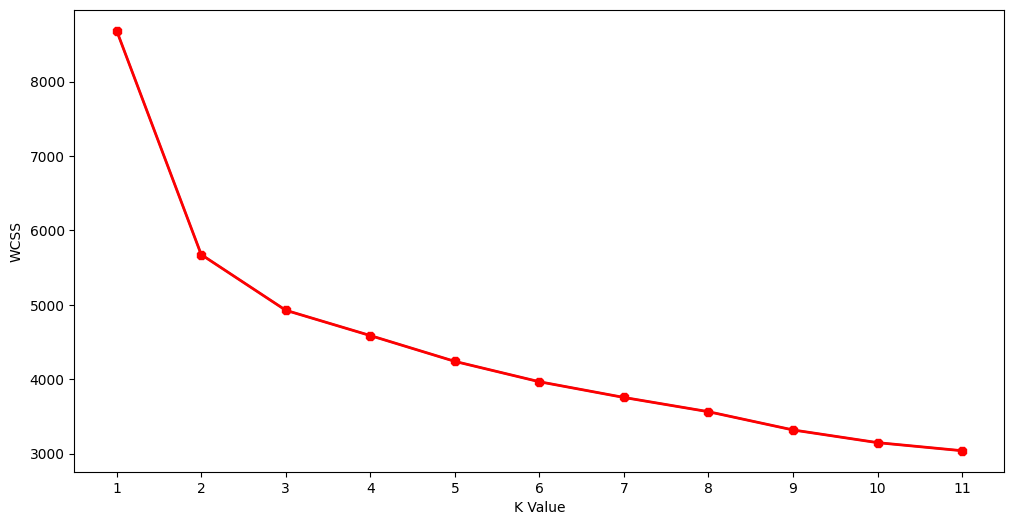

In [9]:
wcss=[]
RANGE = 12

for i in range(1,RANGE):
    km=KMeans(n_clusters=i, init='k-means++', random_state=1492)
    km.fit(df_clusters[key_features_winsor])
    wcss.append(km.inertia_)
    
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,RANGE),wcss)
plt.plot(range(1,RANGE),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,RANGE,1))
plt.ylabel("WCSS")
plt.show()

In [10]:
#Taking 5 clusters
km1=KMeans(n_clusters=4, init='random', random_state=1492)
#Fitting the input data
km1.fit(df_clusters[key_features_winsor])

KMeans(init='random', n_clusters=4, random_state=1492)

In [11]:
#predicting the labels of the input data
y=km1.predict(df_clusters[key_features_winsor])

In [12]:
#adding the labels to a column named label
df_clusters["label"] = y

In [13]:
#The new dataframe with the clustering done
df_clusters.head()

,CO(GT),PT08.S1(CO),NO2(GT),PT08.S4(NO2),T,RH,AH,day,year,quarter,weekday,CO(GT)_winsor,PT08.S1(CO)_winsor,PT08.S4(NO2)_winsor,NO2(GT)_winsor,T_winsor,RH_winsor,AH_winsor,day_winsor,year_winsor,quarter_winsor,weekday_winsor,label
0,2.6,1360.0,113.0,1692.0,13.6,48.9,0.7578,10.0,2004.0,1.0,2.0,0.609095,0.783328,0.747936,0.636118,0.546300,0.666742,0.354464,0.62198,0.0,0.0,0.564575,3
1,2.0,1292.0,92.0,1559.0,13.3,47.7,0.7255,10.0,2004.0,1.0,2.0,0.491514,0.711040,0.664232,0.521024,0.536480,0.650206,0.329419,0.62198,0.0,0.0,0.564575,3
2,2.2,1402.0,114.0,1555.0,11.9,54.0,0.7502,10.0,2004.0,1.0,2.0,0.533136,0.826194,0.661605,0.641056,0.487745,0.732847,0.348613,0.62198,0.0,0.0,0.564575,3
3,2.2,1376.0,122.0,1584.0,11.0,60.0,0.7867,10.0,2004.0,1.0,2.0,0.533136,0.799812,0.680497,0.679073,0.453538,0.803184,0.376487,0.62198,0.0,0.0,0.564575,3
4,1.6,1272.0,116.0,1490.0,11.2,59.6,0.7888,10.0,2004.0,1.0,2.0,0.399226,0.689053,0.617949,0.650802,0.461356,0.798715,0.378073,0.62198,0.0,0.0,0.564575,3


# Analysis

In [14]:
df_analysis = df_clusters[key_features_original+['label']]

In [15]:
df_analysis.sample(3)

,CO(GT),PT08.S1(CO),NO2(GT),PT08.S4(NO2),T,RH,AH,day,year,quarter,weekday,label
7393,5.7,1517.0,182.0,1902.0,14.1,57.8,0.9262,12.0,2005.0,1.0,2.0,0
4299,1.6,988.0,109.0,1341.0,27.1,26.9,0.9524,5.0,2004.0,3.0,6.0,2
5215,1.8,786.0,109.0,1123.0,15.0,56.4,0.9554,14.0,2004.0,4.0,3.0,2


In [16]:
df_analysis.describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),9357.0,2.089302,1.323024,0.1000,1.2000,1.8000,2.6000,11.900
PT08.S1(CO),9357.0,1098.392433,212.911465,647.0000,941.0000,1063.0000,1221.0000,2040.000
NO2(GT),9357.0,112.373303,43.948519,2.0000,86.0000,109.0000,133.0000,340.000
PT08.S4(NO2),9357.0,1456.528054,339.370072,551.0000,1242.0000,1463.0000,1662.0000,2775.000
T,9357.0,18.297574,8.658221,-1.9000,12.0000,17.8000,24.1000,44.600
RH,9357.0,49.248509,16.974949,9.2000,36.6000,49.6000,61.9000,88.700
AH,9357.0,1.024352,0.395878,0.1847,0.7461,0.9954,1.2962,2.231
day,9357.0,15.876884,8.808653,1.0000,8.0000,16.0000,23.0000,31.000
year,9357.0,2004.240141,0.427192,2004.0000,2004.0000,2004.0000,2004.0000,2005.000
quarter,9357.0,2.422571,1.134365,1.0000,1.0000,2.0000,3.0000,4.000


In [17]:
df_analysis[df_analysis['label']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),2247.0,2.044192,1.335288,0.1000,1.1000,1.8000,2.70000,8.700
PT08.S1(CO),2247.0,1107.112150,200.835137,715.0000,958.0000,1063.0000,1222.00000,1846.000
NO2(GT),2247.0,141.070316,50.681205,17.0000,109.0000,138.0000,173.00000,340.000
PT08.S4(NO2),2247.0,1163.965732,272.225393,551.0000,948.0000,1134.0000,1366.50000,2147.000
T,2247.0,10.495461,5.846498,-1.9000,5.6000,9.8000,14.30000,30.000
RH,2247.0,52.262127,16.029349,9.9000,40.8000,50.9000,64.75000,86.600
AH,2247.0,0.673987,0.259947,0.1847,0.4463,0.6604,0.89735,1.393
day,2247.0,15.022697,8.916698,1.0000,7.0000,15.0000,23.00000,31.000
year,2247.0,2005.000000,0.000000,2005.0000,2005.0000,2005.0000,2005.00000,2005.000
quarter,2247.0,1.038718,0.192966,1.0000,1.0000,1.0000,1.00000,2.000


In [18]:
df_analysis[df_analysis['label']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),1466.0,1.607503,0.766926,0.100,1.100000,1.8000,1.900000,6.6000
PT08.S1(CO),1466.0,996.383356,147.832704,676.000,887.250000,988.0000,1088.000000,1520.0000
NO2(GT),1466.0,93.009550,32.392852,5.000,71.000000,101.0000,109.000000,239.0000
PT08.S4(NO2),1466.0,1431.698499,242.877678,698.000,1286.000000,1439.0000,1591.500000,2381.0000
T,1466.0,19.790109,7.928370,2.600,13.800000,19.1000,25.100000,41.7000
RH,1466.0,48.114734,17.284434,9.200,34.900000,48.0000,61.300000,87.2000
AH,1466.0,1.072660,0.367842,0.334,0.810075,1.0674,1.325725,2.0821
day,1466.0,17.047749,8.569119,1.000,10.000000,17.0000,25.000000,31.0000
year,1466.0,2004.000000,0.000000,2004.000,2004.000000,2004.0000,2004.000000,2004.0000
quarter,1466.0,2.893588,0.917557,1.000,2.000000,3.0000,4.000000,4.0000


In [19]:
df_analysis[df_analysis['label']==2].describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),3065.0,1.391648,0.567387,0.1000,0.9000,1.5000,1.8000,4.3000
PT08.S1(CO),3065.0,965.854160,110.334591,647.0000,883.0000,969.0000,1052.0000,1332.0000
NO2(GT),3065.0,85.251223,28.371168,2.0000,63.0000,88.0000,109.0000,216.0000
PT08.S4(NO2),3065.0,1387.815334,206.355866,682.0000,1279.0000,1426.0000,1529.0000,1932.0000
T,3065.0,19.790310,7.775821,1.2000,14.4000,19.1000,24.7000,42.2000
RH,3065.0,50.049690,16.877328,10.0000,38.0000,49.8000,62.3000,88.7000
AH,3065.0,1.123784,0.382103,0.1988,0.8831,1.0592,1.3974,2.1806
day,3065.0,16.146493,8.684626,1.0000,9.0000,16.0000,24.0000,31.0000
year,3065.0,2004.000000,0.000000,2004.0000,2004.0000,2004.0000,2004.0000,2004.0000
quarter,3065.0,2.900163,0.899929,1.0000,2.0000,3.0000,4.0000,4.0000


In [20]:
df_analysis[df_analysis['label']==3].describe().T

,count,mean,std,min,25%,50%,75%,max
CO(GT),2579.0,3.231601,1.436817,1.4000,2.1000,2.9000,4.00000,11.900
PT08.S1(CO),2579.0,1306.295463,179.938259,934.0000,1168.0000,1282.0000,1420.00000,2040.000
NO2(GT),2579.0,130.610702,32.872330,27.0000,109.0000,122.0000,148.00000,288.000
PT08.S4(NO2),2579.0,1807.203567,256.311212,1086.0000,1635.0000,1782.0000,1954.00000,2775.000
T,2579.0,22.472858,7.764322,1.4000,16.8000,21.8000,27.50000,44.600
RH,2579.0,46.315161,17.191819,9.3000,32.4000,47.1000,58.70000,86.500
AH,2579.0,1.183983,0.337500,0.3003,0.9295,1.1381,1.45105,2.231
day,2579.0,15.635130,8.910547,1.0000,8.0000,16.0000,23.00000,31.000
year,2579.0,2004.000000,0.000000,2004.0000,2004.0000,2004.0000,2004.00000,2004.000
quarter,2579.0,2.792943,0.996392,1.0000,2.0000,3.0000,4.00000,4.000


In [21]:
analysis = 'analysis.csv'

In [22]:
df_analysis.to_csv(analysis, index=False)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_features_with_categorical(df, features, categorical_var):
    size = len(features)
    
    # Create a figure with subplots in a single row
    fig, axes = plt.subplots(1, size, figsize=(7 * size, 5), dpi=100)

    # Ensure axes is iterable, even if there's only one subplot
    if size == 1:
        axes = [axes]
    
    # Loop through each feature and create a displot
    for i, feature in enumerate(features):
        sns.histplot(df, x=feature, hue=categorical_var, kde=True, fill=True, ax=axes[i])
        
        # Set the title and labels for each subplot
        axes[i].set_title(f'{feature} by {categorical_var}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')

    # Adjust the layout to avoid overlap
    plt.tight_layout()
    plt.show()

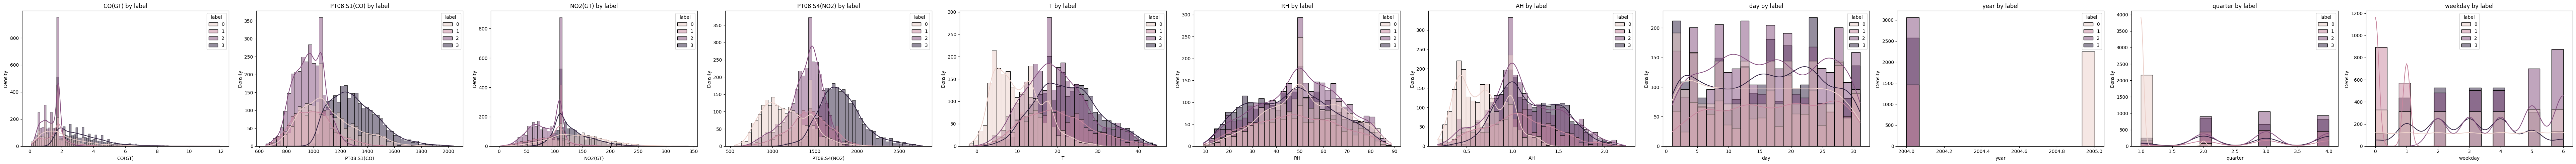

In [24]:
plot_features_with_categorical(df_clusters, key_features_original, 'label')

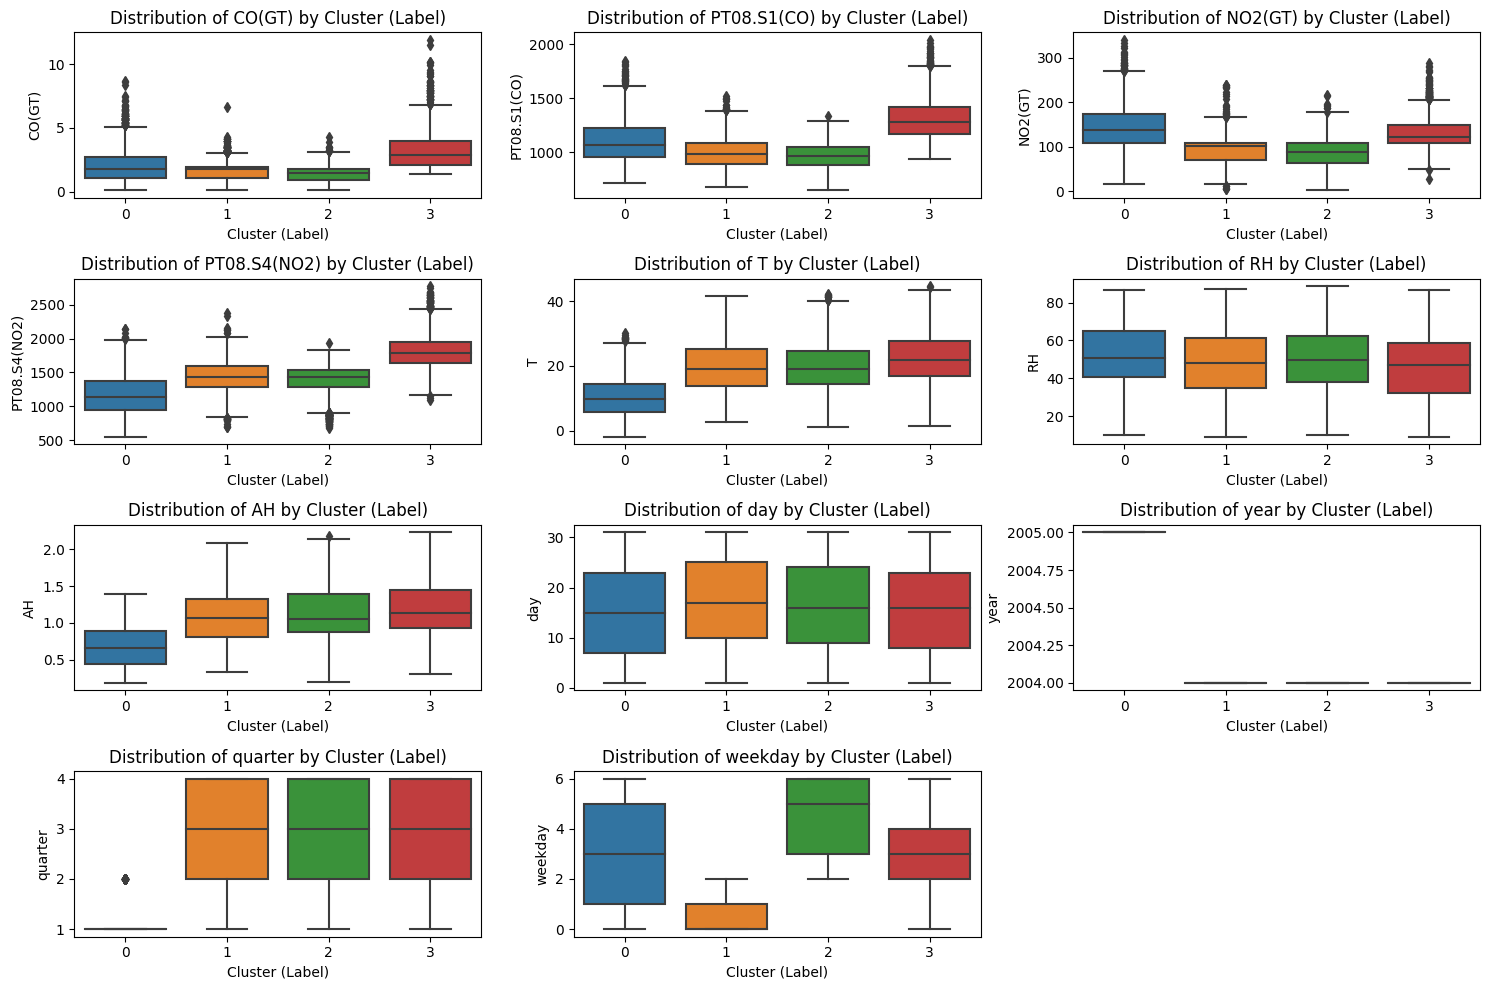

In [25]:
plt.figure(figsize=(15, 10))

# Select a subset of variables for visualization
variables_to_plot = key_features_original

# Create a boxplot for each variable, showing distribution by label (cluster)
for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='label', y=var, data=df_clusters)
    plt.title(f'Distribution of {var} by Cluster (Label)')
    plt.xlabel('Cluster (Label)')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

# PCA Visualizations

Now we visualize the segmentation of the data via principal components. In this case, for simplicity, we take the two principal components that contain the most information about the total variance. The first principal component captures the maximum possible variance in the data, while the second captures the next highest amount of variance. Both are orthogonal to each other.

In [26]:
list_labels = list(df_clusters['label'].drop_duplicates())

In [27]:
for number in range(len(list_labels)):
    print(df_clusters[df_clusters['label']==number].shape[0])

2247
1466
3065
2579


In [28]:
from sklearn.decomposition import PCA

In [29]:
components = df_clusters[key_features_winsor].shape[1]

In [30]:
pca = PCA(components)
data = pca.fit_transform(df_clusters[key_features_winsor])

In [31]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

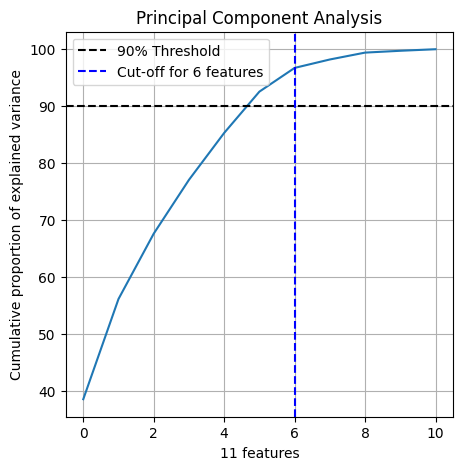

In [32]:
# Plot the graph
plt.figure(figsize=(5, 5))
plt.plot(cumsum*100)

# Add horizontal lines
plt.axhline(y=90, color='black', linestyle='--', label='90% Threshold')

# Add vertical lines
plt.axvline(x=d, color='b', linestyle='--', label=f'Cut-off for {d} features')

# Add labels and legend
plt.xlabel(f'{components} features')
plt.ylabel('Cumulative proportion of explained variance')
plt.title('Principal Component Analysis')
plt.legend()

# Show plot
plt.grid(True)
#plt.savefig('pca.png', dpi=100, bbox_inches="tight")
plt.show()

Then, it is only necessary to consider $5$ features in order to have at least $90\%$ of the information associated to the variance of the original data

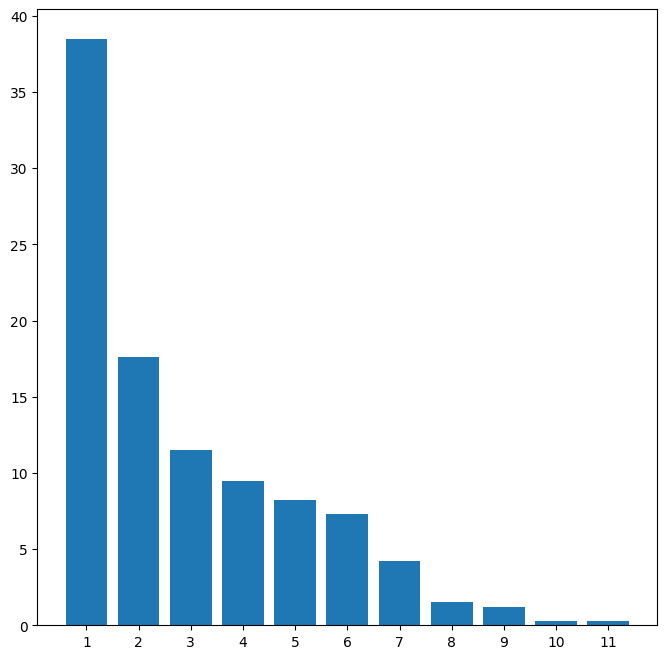

In [33]:
plt.figure(figsize=(8,8))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1, len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

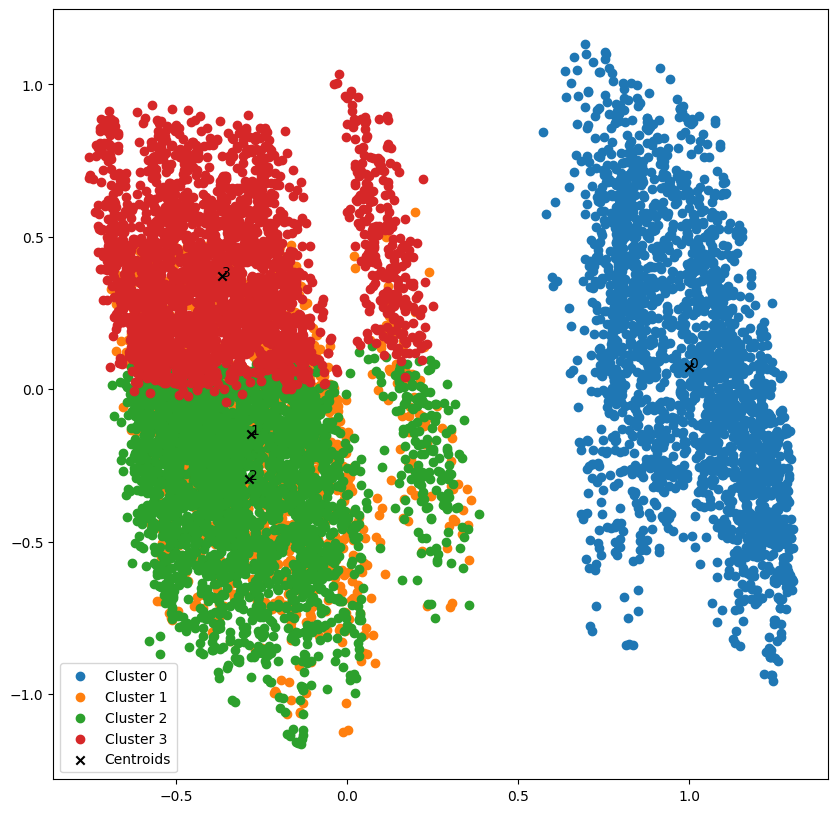

In [34]:
centers = np.array(km1.cluster_centers_)
# KMeans clustering
#model = KMeans(n_clusters=7, init="k-means++")
model = KMeans(n_clusters=len(list_labels), init="random", random_state=1492)

label = model.fit_predict(data)
centers = np.array(model.cluster_centers_)

# Plotting
plt.figure(figsize=(10, 10))
uniq = np.unique(label)

for i in uniq:
    plt.scatter(data[label == i, 0], data[label == i, 1], label=f'Cluster {i}')

plt.scatter(centers[:, 0], centers[:, 1], marker="x", color='k', label='Centroids')

# Annotating cluster points with labels
for i, txt in enumerate(uniq):
    plt.annotate(txt, (centers[i, 0], centers[i, 1]), fontsize=10, color='k')

plt.legend()
plt.show()

## Two Principal Components

In [35]:
pca = PCA(2)
data = pca.fit_transform(df_clusters[key_features_winsor])

In [36]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1

Then, it is only necessary to consider $5$ features in order to have at least $90\%$ of the information associated to the variance of the original data

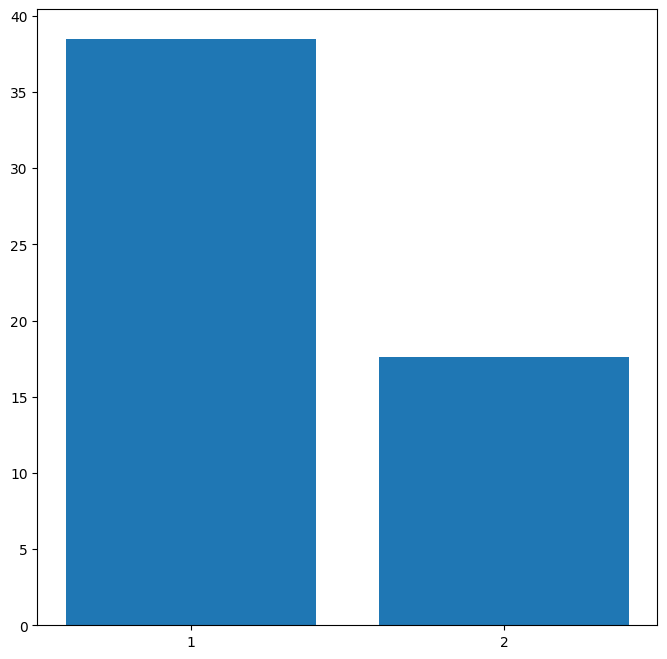

In [37]:
plt.figure(figsize=(8,8))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = [str(x) for x in range(1, len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.show()

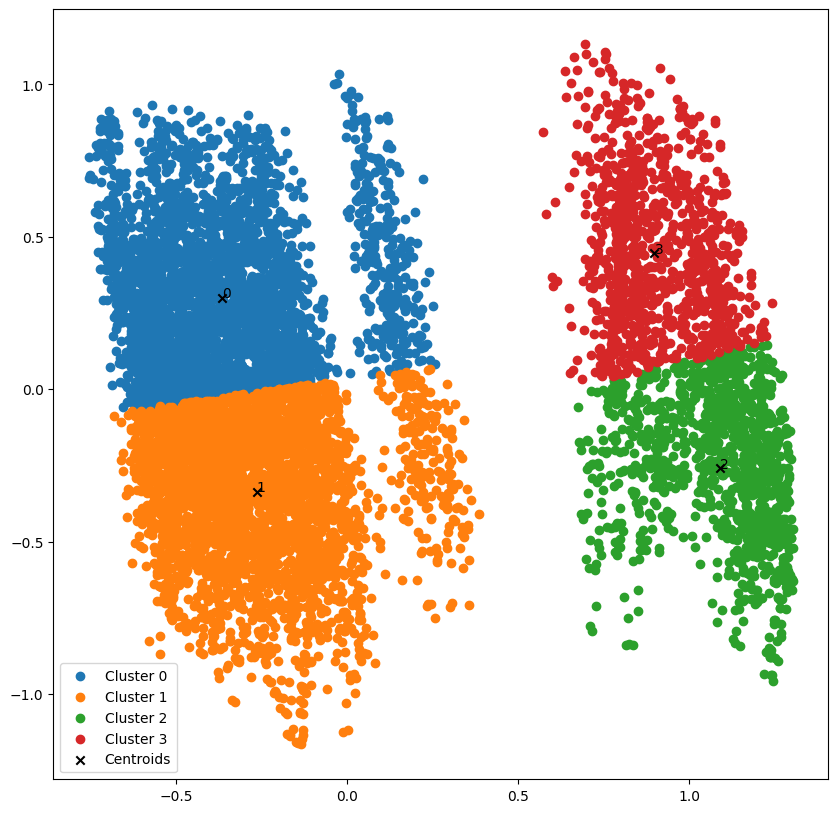

In [38]:
centers = np.array(km1.cluster_centers_)
# KMeans clustering
#model = KMeans(n_clusters=7, init="k-means++")
model = KMeans(n_clusters=len(list_labels), init="random", random_state=1492)

label = model.fit_predict(data)
centers = np.array(model.cluster_centers_)

# Plotting
plt.figure(figsize=(10, 10))
uniq = np.unique(label)

for i in uniq:
    plt.scatter(data[label == i, 0], data[label == i, 1], label=f'Cluster {i}')

plt.scatter(centers[:, 0], centers[:, 1], marker="x", color='k', label='Centroids')

# Annotating cluster points with labels
for i, txt in enumerate(uniq):
    plt.annotate(txt, (centers[i, 0], centers[i, 1]), fontsize=10, color='k')

plt.legend()
plt.show()

# Limitations of Air Quality Models
## Data Quality and Availability:
1. Incomplete data, for example, respect geolocation or vehicular traffic, or devices errors/calibrations can limit the accuracy of predictions.
2. Lack of real-time data integration might affect the responsiveness of the model to sudden changes in air quality.
3. Models might not adequately represent local variations if the spatial resolution is too coarse.
## Possible Improvements
1. Increase the spatial and temporal resolution of models to capture microclimates and rapid changes better.
2. Use localized models for areas with significant human activity to get more accurate predictions for those regions.
3. Include traffic data, industrial output, and even social media data for real-time incident reporting.
4. Use advanced meteorological modeling to better understand and predict the impact of weather conditions.
5. Develop an integrated system that combines air quality data with public health data to directly correlate pollution levels with health outcomes. Different data sources APIs, etc.
6. Implement real-time data processing and predictive analytics to provide immediate warnings and updates.
7. Leverage IoT and edge computing to process data closer to the source, reducing latency.
# Technical requirements
1. We would require MLOps frameworks to put in production such type of models.
2. It would be important to consider a machine learning architecture to integrate the different data sources with the different stages of the production phase.
3. Continuously monitoring of model performance and data distribution.
4. Real-time or near-to-real-time responses, depending of the final bussiness goal, e.g. reduce the bad quality of air by locations, hours, etc.
5. Track the different models in order to mabage the manage machine learning lifecycle;
6. A/B Testing to verify that different models in fact preserve suitable metrics in real-world scenarios;
7. Integration of different data sources;traffic, industrial outputs, and social media.